<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/m2l_wa_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing dependencies
This workshop will use three libraries from the Loop project
1. LoopStructural - https://github.com/Loop3D/LoopStructural
2. map2loop - https://github.com/Loop3D/map2loop-2
3. tomofast-x - https://github.com/TOMOFAST/Tomofast-x

The following code blocks will install the required dependencies for the Loop libraries into this colab environment. Alternatively, the workshop can be run using the docker image.

In [ ]:
!git clone https://github.com/TOMOFAST/Tomofast-x.git

In [ ]:
%cd Tomofast-x
!make

In [ ]:
%cd tomofast-X
!./tomofastx -j ./parfiles/Parfile_mansf_slice.txt

In [ ]:
%cd ..

## map2loop + LoopStructural

In [10]:
!pip install rasterio
!pip install git+https://github.com/geopandas/geopandas.git@v0.10.2
!pip install hjson
!pip install owslib
!pip install git+https://github.com/Loop3D/map2model_cpp.git
!pip install git+https://github.com/Loop3D/LoopProjectFile.git
!pip install pygeos
!pip install mplstereonet
!pip install lavavu-osmesa
!pip install LoopStructural
!pip install git+https://github.com/Loop3d/map2loop-2.git
!pip install ipyvolume
!pip install beartype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/geopandas/geopandas.git (to revision v0.10.2) to /tmp/pip-req-build-_ja87l1a
  Running command git clone -q https://github.com/geopandas/geopandas.git /tmp/pip-req-build-_ja87l1a
  Running command git checkout -q a65bda0a1ec25b99b02398865fd299852f7bac46
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3D/map2model_cpp.git to /tmp/pip-req-build-5kk3zq24
  Running command git clone -q https://github.com/Loop3D/map2model_cpp.git /tmp/pip-req-build-5kk3zq24
  Running command git submodule up

In [11]:
import matplotlib

In [12]:
bbox_3d = {'minx': 509727.48772433,
     'miny': 7491991.14850445,
     'maxx': 522116.39294858,
     'maxy': 7500358.30361626,
     'base': -4800,
     'top': 1200}

In [13]:
import os
import hjson
from map2loop.m2l_enums import VerboseLevel
from map2loop.project import Project


out_dir='./newnew'


proj = Project( 
                 loopdata_state = "WA",
            project_path=out_dir,
    project_crs='EPSG:28350',
    verbose_level=VerboseLevel.NONE,
    working_projection='EPSG:28350',
                )

proj.update_config(
                    out_dir=out_dir,
                    bbox_3d=bbox_3d,
                    project_crs='EPSG:28350',
                    # overwrite='true',
                    # run_flags={'fault_dip':-999},
                    # quiet='None',
    
#                     loopFilename='test.loop3d'
                  )


The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.


Warnings:
   -> 17 NaN/blank found in column "supersuite" of geology file, replacing with 0


The warnings listed above were issued checking the GEOLOGY map



Warnings:
   -> No fault dip estimate text for fault polylines
   -> 9 NaN/blank found in column "dip_dir" of fault file, replacing with -999
   -> 9 NaN/blank found in column "dip_est" of fault file, replacing with -999


The warnings listed above were issued checking the FAULT map


In [14]:
proj.run()

100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


In [15]:
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

In [16]:
f=open(proj.config.tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()

In [17]:
from LoopStructural import GeologicalModel
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
                'step':10,
                'fault_buffer':0.2,
#                 'force_mesh_geometry':True,
#                 'solver':'pyamg',
#                 overprints:overprints,
#                 'cpw':1,
#                 'gpw':5,
               }
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':5e4,  # how many tetras/voxels
                    'buffer':2.,  # how much to extend nterpolation around box
#                     'solver':'pyamg',
#                     'damp':True
                    # 'npw':0,
                    # 'regularisation':0.5
                   }


model, m2l_data = GeologicalModel.from_map2loop_directory(proj.config.project_path,
                                                              evaluate=False,
                                                          fault_params=fault_params,
                                                          rescale=False,
#                                                           vectorscale=1,
                                                          foliation_params=foliation_params)

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.WARNING: 2022-08-10 07:50:51,205: _fault_builder.py:194 -- Rescaling fault norm constraint length for fault frame


In [18]:
model.update()

  0%|          | 0/13 [00:00<?, ?it/s]

In [19]:
from LoopStructural.visualisation import LavaVuModelViewer

In [58]:
view = LavaVuModelViewer(model)
view.add_model_surfaces()
view.interactive()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]


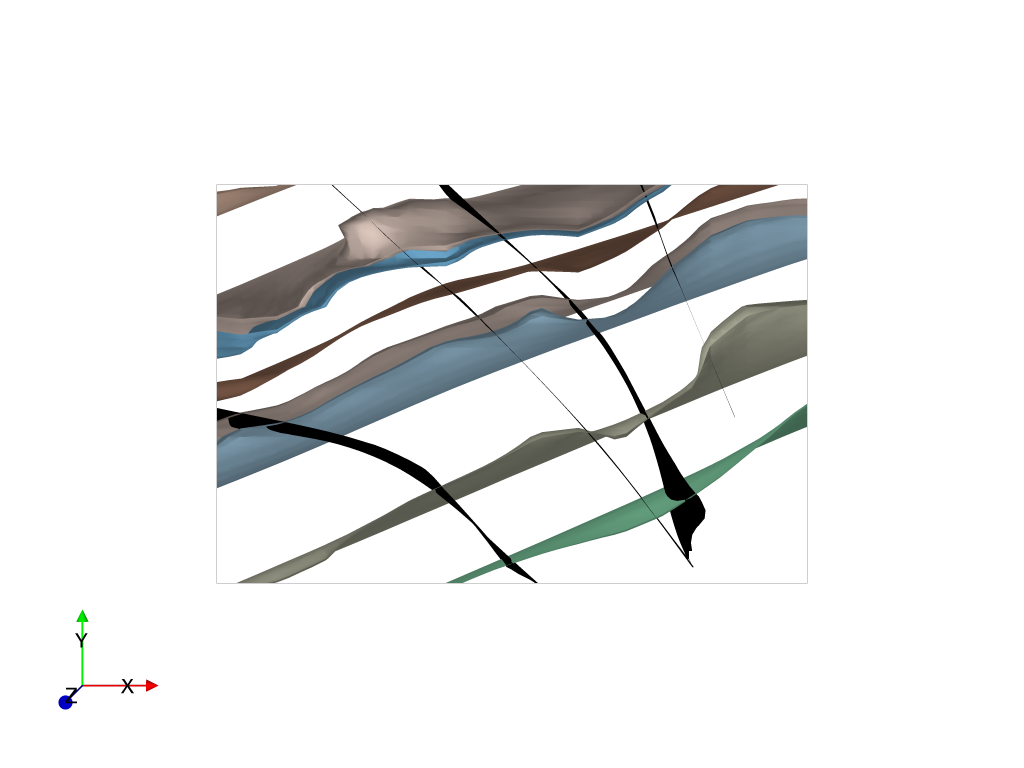

In [21]:
view.display()

In [23]:
!pip install git+https://github.com/Loop3D/LoopFlow.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3D/LoopFlow.git to /tmp/pip-req-build-2ga5lrk6
  Running command git clone -q https://github.com/Loop3D/LoopFlow.git /tmp/pip-req-build-2ga5lrk6
  Created wheel for LoopFlow: filename=LoopFlow-1.2.8-py3-none-any.whl size=20307 sha256=a5d40ac71c7114eb78f6ff9d5e1e30c4240275031609c371d3152434091f136a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wdmsa995/wheels/7b/60/3c/3a8b71c91c84840a165cc0985f671ed769cc83cb6fca34e1e6
Successfully built LoopFlow


In [25]:
from LoopFlow import import_triangulation as it
from LoopFlow import calculate_flow as cf



bbox=it.create_bbox(minx,miny,maxx,maxy,model_base,model_top)
destination=out_dir

In [26]:
voxel_size=750


Graw,df_nodes_raw,df_edges_raw=cf.graph_from_model(model,voxel_size,bbox,destination)


nnx,nny,nnz 16 11 8
Running topological_analysis version 0.1.15


In [60]:
faults_only=False
                    
scenario={     #free-form scenario   
        'fault_node':1000.0,
        'geological_formation_slow':1000.0,
        'geological_formation_fast':1.0,
        'interformation_node':1000.0,

        'fault_formation':1000.0,
        'same_fault':1000.0,
        'fault_fault':1000.0,
        'interform_fault':1000.0,
        'interform_formation':100.0,
        'interform_interform':100.0,
        'same_interform':100.0,

        'fast_formation_code':['0']
        }
scenario='fast_faults' #pre-defined scenario
                        # fast_faults    
                        # fast_strat_contacts 
                        # fast_both  
                        # fault_barriers_not_paths  
                        # fault_barriers_but_paths_and_fast_strat
                        #homogeneous

source='west' # 'west','north', 'south', top', 'base', 'deep_line', 'point'
target='east' # 'west','north', 'south', top', 'base', 'deep_line', 'point'
fast_formation_code=['5']

ptx=(bbox.loc[0].minx+bbox.loc[0].maxx)/2
pty=(bbox.loc[0].miny+bbox.loc[0].maxy)/2
ptz=bbox.loc[0].lower

f=open(destination+'/parameters.txt','w')
f.write('faults_only = {}\nscenario = {}\nsource = {}\nfast_litho = {}\npoint = {},{},{}\n'.format(faults_only,str(scenario),source,fast_formation_code,ptx,pty,ptz))
f.close()

G,scenario=cf.assign_weights(Graw,scenario,source,target,fast_formation_code,faults_only,bbox,ptx,pty,ptz)
voxet_df,distance,path=cf.calculate_dist(G,df_nodes_raw,voxel_size,bbox,scenario,destination)
cf.calculate_paths(path,df_nodes_raw,scenario,destination)

range= 1000 509727.48772433 522116.39294858
range_min= 509727.48772433
range_max= 510727.48772433
10-Aug-2022 (08:21:49) - west NODE ADDED
range= 1000 509727.48772433 522116.39294858
range_min= 521116.39294858
range_max= 522116.39294858
10-Aug-2022 (08:21:49) - east NODE ADDED
10-Aug-2022 (08:21:49) - WEIGHTS ASSIGNED
source= -1
10-Aug-2022 (08:21:50) - DISTS CALCULATED
10-Aug-2022 (08:21:50) - PATHS CALCULATED


In [61]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import ipyvolume as ipv
LoadPath = out_dir


In [62]:
df = pd.read_csv(LoadPath+'/'+scenario+"_path_count.csv")

df['color']=256*np.sqrt(df['count'])/np.sqrt(df['count'].max())
df['color']=df['color'].astype('int')


In [63]:
x_lim = [df.X.min(), df.X.values.max()]
y_lim = [df.Y.min(), df.Y.values.max()]
z_lim = [df.Z.min(), df.Z.values.max()]
xyz_lim = [np.min([x_lim, y_lim, z_lim]), np.max([x_lim, y_lim, z_lim])]




In [64]:
import matplotlib.cm
from google.colab import output
output.enable_custom_widget_manager()

cmap = plt.get_cmap("gnuplot")
c = df.color
colors = cmap(c)


size = 700
fig = ipv.figure(width=size, height=size)
df_cut=df[df['count']>100]
scatter = ipv.scatter(df_cut.X.values, df_cut.Y.values, df_cut.Z.values, 
                      color=colors, size=1, marker="box") # ‘arrow’, ‘box’, ‘diamond’, ‘sphere’, ‘point_2d’,‘square_2d’, ‘triangle_2d’, 

ipv.xlim(x_lim[0], x_lim[1])
ipv.ylim(y_lim[0], y_lim[1])
ipv.zlim(4*z_lim[0], 4*z_lim[1])
ipv.show()


In [52]:
df_cut

,id,X,Y,Z,geocode,description,orthodim,count,color
